In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packag

In [2]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (128, 128, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the Model
classifier.add(Flatten())

# Connecting all layer
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the model
classifier.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/allankim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
/home/allankim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/home/allankim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/home/allankim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [3]:
#pre-processing images taken from keras documentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Images/DATASET/TRAIN',
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'Images/DATASET/TEST',
    target_size=(128, 128),
    batch_size=4,
    class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [4]:
class1 = classifier.fit(
    training_set,
    epochs=25,
    validation_data=test_set)


Epoch 1/25
22564/22564 [==============================] - 83s 4ms/step - loss: 0.4695 - accuracy: 0.7948 - val_loss: 0.0774 - val_accuracy: 0.8484
Epoch 2/25
22564/22564 [==============================] - 82s 4ms/step - loss: 0.4244 - accuracy: 0.8161 - val_loss: 0.0150 - val_accuracy: 0.8444
Epoch 3/25
22564/22564 [==============================] - 81s 4ms/step - loss: 0.4016 - accuracy: 0.8266 - val_loss: 0.5684 - val_accuracy: 0.8639
Epoch 4/25
22564/22564 [==============================] - 81s 4ms/step - loss: 0.3867 - accuracy: 0.8354 - val_loss: 0.0200 - val_accuracy: 0.8754
Epoch 5/25
22564/22564 [==============================] - 81s 4ms/step - loss: 0.3789 - accuracy: 0.8401 - val_loss: 0.1383 - val_accuracy: 0.8679
Epoch 6/25
22564/22564 [==============================] - 80s 4ms/step - loss: 0.3769 - accuracy: 0.8404 - val_loss: 0.1097 - val_accuracy: 0.8842
Epoch 7/25
22564/22564 [==============================] - 81s 4ms/step - loss: 0.3735 - accuracy: 0.8445 - val_loss: 

In [5]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# #split images and labels
# images_train, labels_train = next(training_set)
# images_test, labels_test= next(test_set)

In [6]:
# #Merging all images and labels
# images = np.concatenate((images_train, images_test))
# labels = np.concatenate((labels_train[:,0], labels_test[:,0]))

In [7]:
# #Creating Random Split for test data
# X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=1234)

# #Creating Random Split for validation and training data
# X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=1234)

In [8]:
# classifier.fit(
#     X_train,
#     y_train,
#     epochs=50,
#     validation_data=(X_val, y_val))

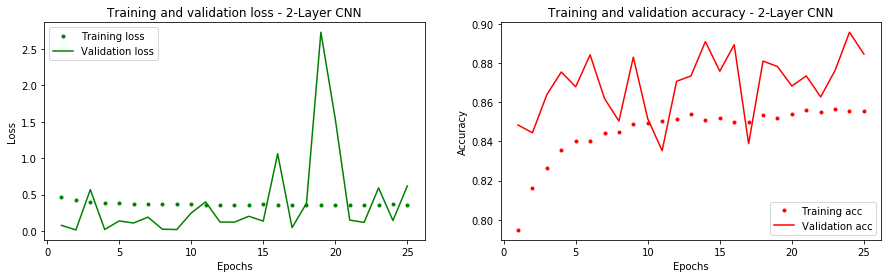

In [10]:
import matplotlib.pyplot as plt
#Extracting CNN Results for Visualization
hist_cnn = class1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn1.png')
plt.show()